In [1]:
import pandas as pd
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB  # Example model
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix, classification_report

import joblib


In [2]:
# Mount Google Drive
drive.mount('/content/drive')

# Load dataset from Google Drive
drive_path = '/content/drive/MyDrive/IDS data sets/'
train_file_minmax = drive_path + 'NF-BoT-IoT-V2_5000 samples_minmax_normalized_train.csv'
test_file_minmax = drive_path + 'NF-BoT-IoT-V2_5000 samples_minmax_normalized_test.csv'

train_data = pd.read_csv(train_file_minmax)
test_data = pd.read_csv(test_file_minmax)

Mounted at /content/drive


In [3]:
print(train_data.columns)

Index(['L4_SRC_PORT', 'L4_DST_PORT', 'PROTOCOL', 'L7_PROTO', 'IN_BYTES',
       'IN_PKTS', 'OUT_BYTES', 'OUT_PKTS', 'TCP_FLAGS', 'CLIENT_TCP_FLAGS',
       'SERVER_TCP_FLAGS', 'FLOW_DURATION_MILLISECONDS', 'DURATION_IN',
       'DURATION_OUT', 'MIN_TTL', 'MAX_TTL', 'LONGEST_FLOW_PKT',
       'SHORTEST_FLOW_PKT', 'MIN_IP_PKT_LEN', 'MAX_IP_PKT_LEN',
       'SRC_TO_DST_SECOND_BYTES', 'DST_TO_SRC_SECOND_BYTES',
       'RETRANSMITTED_IN_BYTES', 'RETRANSMITTED_IN_PKTS',
       'RETRANSMITTED_OUT_BYTES', 'RETRANSMITTED_OUT_PKTS',
       'SRC_TO_DST_AVG_THROUGHPUT', 'DST_TO_SRC_AVG_THROUGHPUT',
       'NUM_PKTS_UP_TO_128_BYTES', 'NUM_PKTS_128_TO_256_BYTES',
       'NUM_PKTS_256_TO_512_BYTES', 'NUM_PKTS_512_TO_1024_BYTES',
       'NUM_PKTS_1024_TO_1514_BYTES', 'TCP_WIN_MAX_IN', 'TCP_WIN_MAX_OUT',
       'ICMP_TYPE', 'ICMP_IPV4_TYPE', 'DNS_QUERY_ID', 'DNS_QUERY_TYPE',
       'DNS_TTL_ANSWER', 'FTP_COMMAND_RET_CODE', 'Attack'],
      dtype='object')


In [4]:
X_train = train_data.drop(columns=['Attack','FTP_COMMAND_RET_CODE'])
y_train = train_data['Attack']

In [5]:
X_test = test_data.drop(columns=['Attack','FTP_COMMAND_RET_CODE'])
y_test = test_data['Attack']

Attack
DDoS              1904
DoS               1771
Reconnaissance     303
Benign              21
Theft                1
Name: count, dtype: int64


<Axes: xlabel='Attack', ylabel='count'>

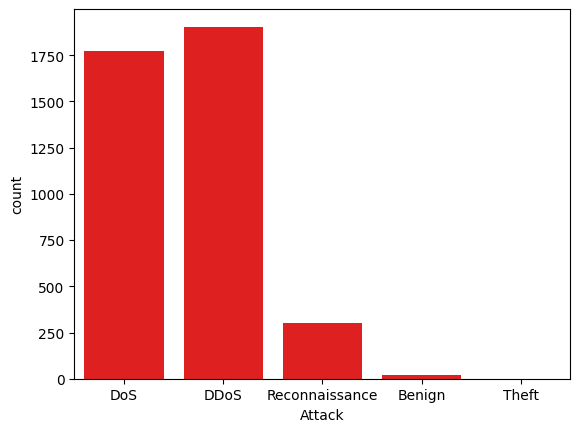

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
X = train_data.drop(['Attack'],axis= 1 )
y = train_data.loc[:, 'Attack']
print( train_data.loc[:, 'Attack'].value_counts())

sns.countplot(data=train_data,x='Attack',color='red')

In [7]:
# Count the number of NaN values in X_train and X_test
X_train_nan_count = X_train.isna().sum().sum()
X_test_nan_count = X_test.isna().sum().sum()

print("Number of NaN values in X_train:", X_train_nan_count)
print("Number of NaN values in X_test:", X_test_nan_count)
print("Number of fearures:", X_train.shape[1])

Number of NaN values in X_train: 4000
Number of NaN values in X_test: 1001
Number of fearures: 40


In [8]:
# Display the number of NaN values per column in X_train and X_test
print("NaN values in each column of X_train:")
print(X_train.isna().sum())

print("\nNaN values in each column of X_test:")
print(X_test.isna().sum())

# Drop columns with any NaN values from X_train and X_test
X_train = X_train.dropna(axis=1)
X_test = X_test.dropna(axis=1)

NaN values in each column of X_train:
L4_SRC_PORT                       0
L4_DST_PORT                       0
PROTOCOL                          0
L7_PROTO                          0
IN_BYTES                          0
IN_PKTS                           0
OUT_BYTES                         0
OUT_PKTS                          0
TCP_FLAGS                         0
CLIENT_TCP_FLAGS                  0
SERVER_TCP_FLAGS                  0
FLOW_DURATION_MILLISECONDS        0
DURATION_IN                       0
DURATION_OUT                      0
MIN_TTL                           0
MAX_TTL                           0
LONGEST_FLOW_PKT                  0
SHORTEST_FLOW_PKT                 0
MIN_IP_PKT_LEN                    0
MAX_IP_PKT_LEN                    0
SRC_TO_DST_SECOND_BYTES           0
DST_TO_SRC_SECOND_BYTES           0
RETRANSMITTED_IN_BYTES            0
RETRANSMITTED_IN_PKTS             0
RETRANSMITTED_OUT_BYTES           0
RETRANSMITTED_OUT_PKTS            0
SRC_TO_DST_AVG_THROUGHPUT 

In [9]:
X_train.shape[0]

4000

In [10]:
y_train.shape[0]

4000

In [12]:
NB = GaussianNB()
NB.fit(X_train,y_train)
y_pred_NB = NB.predict(X_test)
y_pred_NB

array(['DDoS', 'DoS', 'DDoS', ..., 'DoS', 'DDoS', 'DoS'], dtype='<U14')

In [13]:
joblib.dump(NB, "/content/drive/MyDrive/IDS data sets/Naive_Base.joblib")

['/content/drive/MyDrive/IDS data sets/Naive_Base.joblib']

In [14]:
rep_NB = classification_report(y_test,y_pred_NB)
print(rep_NB)

                precision    recall  f1-score   support

        Benign       0.33      0.33      0.33         6
          DDoS       0.99      0.99      0.99       484
           DoS       0.99      0.93      0.96       436
Reconnaissance       0.73      0.96      0.83        75

      accuracy                           0.96      1001
     macro avg       0.76      0.80      0.78      1001
  weighted avg       0.96      0.96      0.96      1001



Text(0.5, 1.0, 'Confusion Matrix')

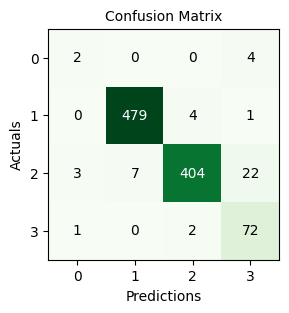

In [15]:
from mlxtend.plotting import plot_confusion_matrix
conf_NB = confusion_matrix(y_test,y_pred_NB)
fig, ax = plot_confusion_matrix(conf_mat=conf_NB,figsize=(3,3), cmap=plt.cm.Greens)

plt.xlabel('Predictions', fontsize=10)
plt.ylabel('Actuals', fontsize=10)
plt.title('Confusion Matrix', fontsize=10)

In [16]:
import numpy as np
from sklearn.model_selection import cross_val_score

score_NB = cross_val_score(NB,X_train,y_train,cv=10,scoring='recall_weighted')
avg_scores_NB = score_NB.mean()
scores_NB_test = cross_val_score(NB, X_test, y_test ,cv = 10, scoring = 'recall_weighted')
avg_scores_NB_test = scores_NB_test.mean()
print("Train score is:",format(avg_scores_NB))
print("Test score is:",format(avg_scores_NB_test))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(


Train score is: 0.9702500000000001
Test score is: 0.9570297029702969


In [19]:
X_train.shape[1]

39

In [20]:
X_test.shape[1]

39